# CNN-LSTM or ConvLSTM model



CNN (Convolutional Neural Network): Used for extracting spatial features from individual frames of the video or sequential images. CNN layers are applied to each frame to learn patterns like edges, textures, and objects.

LSTM (Long Short-Term Memory): Used for capturing temporal dependencies across the sequence of frames. The LSTM processes the sequence of features extracted by the CNNs to understand how these features change over time, which is crucial for tasks like action recognition, video classification, or any application where time-based dynamics are important.


## 70-15-15

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, average_precision_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Image Data Generator for loading and augmenting the data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_generator = train_datagen.flow_from_directory(
    'dataset/70_15_15/train_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/70_15_15/val_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    'dataset/70_15_15/test_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)


Found 1143 images belonging to 2 classes.
Found 245 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.models import Sequential

model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# LSTM layer (if needed, though typically not for image classification)
# Ensure Reshape layer is used if LSTM is included
model.add(Reshape((1, -1)))  # Reshape if using LSTM
model.add(LSTM(64, return_sequences=False))

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_15 (Reshape)            │ (None, 1, 12544)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │     3,227,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,251,521 (12.40 MB)

 Trainable params: 3,251,521 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6658 - loss: 0.6214 - val_accuracy: 0.8408 - val_loss: 0.4637
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7941 - loss: 0.4895 - val_accuracy: 0.8531 - val_loss: 0.4154
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8450 - loss: 0.4317 - val_accuracy: 0.8776 - val_loss: 0.3611
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 990ms/step - accuracy: 0.8435 - loss: 0.3801 - val_accuracy: 0.8531 - val_loss: 0.3583
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8717 - loss: 0.3522 - val_accuracy: 0.8776 - val_loss: 0.3624
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8768 - loss: 0.3483 - val_accuracy: 0.8776 - val_loss: 0.3604
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 999ms/step - accuracy: 0.8636 - loss: 0.3488 - val_accuracy: 0.8898 - val_loss: 0.3225
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8767 - loss: 0.3391 - val_accuracy: 0.8857 - val_lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 803ms/step - accuracy: 0.8362 - loss: 1.3741
Test Accuracy: 0.8821138143539429
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 801ms/step
Precision: 0.8736263736263736
Recall (Sensitivity): 0.9636363636363636
F1 Score: 0.9164265129682997
F2 Score: 0.9441805225653207
Accuracy: 0.8821138211382114
AUC-ROC: 0.8398428731762067
Average Precision (AP): 0.8662483857605809
Cohen's Kappa: 0.7180460042684373
Diagnostic Odds Ratio: 66.82608695652173
              precision    recall  f1-score   support

     Healthy       0.91      0.72      0.80        81
    Glaucoma       0.87      0.96      0.92       165

    accuracy                           0.88       246
   macro avg       0.89      0.84      0.86       246
weighted avg       0.88      0.88      0.88       246



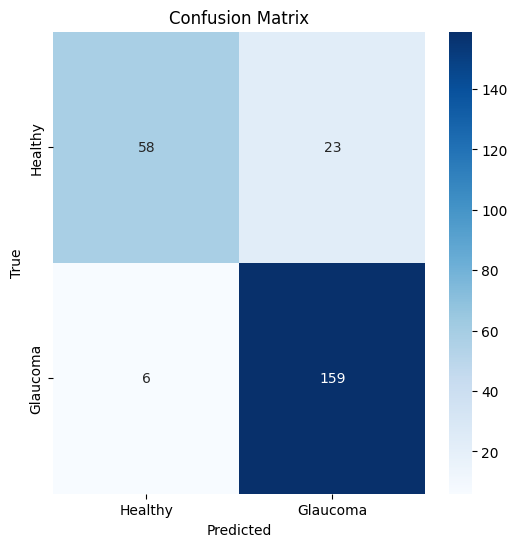

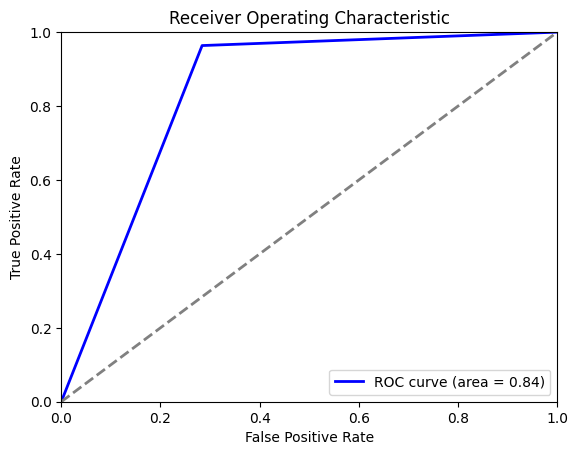

In [39]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Predictions
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int).flatten()
y_true = test_generator.classes

# Metrics Calculation
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
f2 = fbeta_score(y_true, y_pred, beta=2, pos_label=1)
accuracy = accuracy_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred)
ap_score = average_precision_score(y_true, y_pred)
cohen_kappa = cohen_kappa_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
diagnostic_odds_ratio = (conf_matrix[1, 1] * conf_matrix[0, 0]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {recall}')
print(f'F1 Score: {f1}')
print(f'F2 Score: {f2}')
print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc_roc}')
print(f'Average Precision (AP): {ap_score}')
print(f'Cohen\'s Kappa: {cohen_kappa}')
print(f'Diagnostic Odds Ratio: {diagnostic_odds_ratio}')

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Healthy', 'Glaucoma']))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Glaucoma'], yticklabels=['Healthy', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 80-10-10

In [40]:
# Image Data Generator for loading and augmenting the data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_generator = train_datagen.flow_from_directory(
    'dataset/80_10_10/train_80_10_10',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/80_10_10/val_80_10_10',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    'dataset/80_10_10/test_80_10_10',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)


Found 1306 images belonging to 2 classes.
Found 164 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [41]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.models import Sequential

model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# LSTM layer (if needed, though typically not for image classification)
# Ensure Reshape layer is used if LSTM is included
model.add(Reshape((1, -1)))  # Reshape if using LSTM
model.add(LSTM(64, return_sequences=False))

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_16 (Reshape)            │ (None, 1, 12544)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │     3,227,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,251,521 (12.40 MB)

 Trainable params: 3,251,521 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8358 - loss: 0.4207 - val_accuracy: 0.8354 - val_loss: 0.3821
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8378 - loss: 0.4099 - val_accuracy: 0.8415 - val_loss: 0.4015
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 954ms/step - accuracy: 0.8665 - loss: 0.3803 - val_accuracy: 0.8598 - val_loss: 0.3612
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 950ms/step - accuracy: 0.8588 - loss: 0.3641 - val_accuracy: 0.8902 - val_loss: 0.3243
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 944ms/step - accuracy: 0.8674 - loss: 0.3471 - val_accuracy: 0.8902 - val_loss: 0.3245
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 946ms/step - accuracy: 0.9054 - loss: 0.2824 - val_accuracy: 0.8841 - val_loss: 0.3980
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 954ms/step - accuracy: 0.8711 - loss: 0.3373 - val_accuracy: 0.8841 - val_loss: 0.3164
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 921ms/step - accuracy: 0.8924 - loss: 0.2937 - val_ac

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7976 - loss: 0.8474
Test Accuracy: 0.8536585569381714
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 844ms/step
Precision: 0.8412698412698413
Recall (Sensitivity): 0.9636363636363636
F1 Score: 0.8983050847457628
F2 Score: 0.9363957597173145
Accuracy: 0.8536585365853658
AUC-ROC: 0.7966329966329966
Average Precision (AP): 0.8350684545806497
Cohen's Kappa: 0.6416605972323379
Diagnostic Odds Ratio: 45.05
              precision    recall  f1-score   support

     Healthy       0.89      0.63      0.74        54
    Glaucoma       0.84      0.96      0.90       110

    accuracy                           0.85       164
   macro avg       0.87      0.80      0.82       164
weighted avg       0.86      0.85      0.85       164



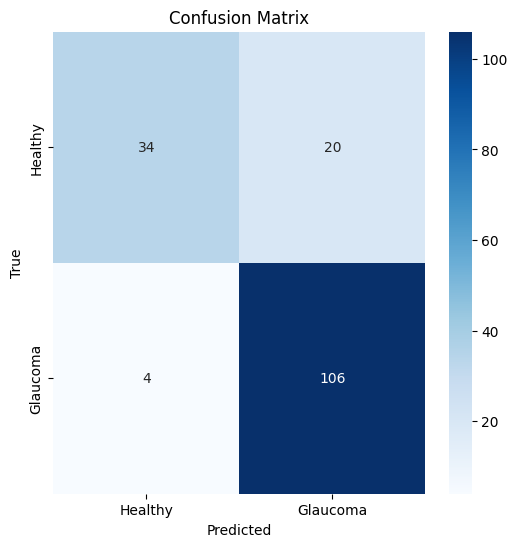

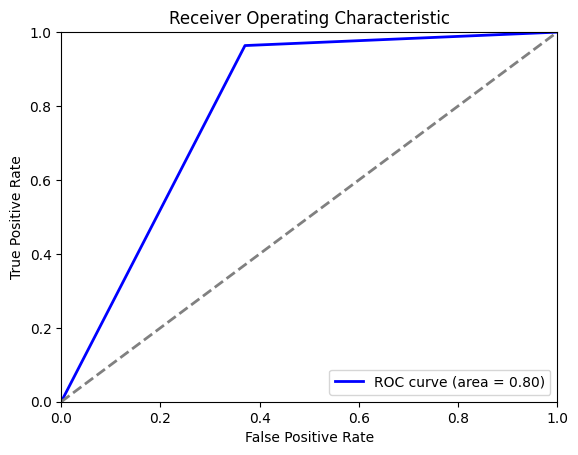

In [44]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Predictions
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int).flatten()
y_true = test_generator.classes

# Metrics Calculation
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
f2 = fbeta_score(y_true, y_pred, beta=2, pos_label=1)
accuracy = accuracy_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred)
ap_score = average_precision_score(y_true, y_pred)
cohen_kappa = cohen_kappa_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
diagnostic_odds_ratio = (conf_matrix[1, 1] * conf_matrix[0, 0]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {recall}')
print(f'F1 Score: {f1}')
print(f'F2 Score: {f2}')
print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc_roc}')
print(f'Average Precision (AP): {ap_score}')
print(f'Cohen\'s Kappa: {cohen_kappa}')
print(f'Diagnostic Odds Ratio: {diagnostic_odds_ratio}')

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Healthy', 'Glaucoma']))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Glaucoma'], yticklabels=['Healthy', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# New

Early Stopping: Added to stop training if the validation loss stops improving.

Class Weighting: Implemented to balance the influence of each class during training.

Data Augmentation: Enhanced augmentation techniques to increase the variety of training images and reduce overfitting.

Dropout: Increased the dropout rate to 0.5 to help prevent overfitting.

Found 1143 images belonging to 2 classes.
Found 245 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_17 (Reshape)            │ (None, 1, 12544)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │     3,227,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,251,521 (12.40 MB)

 Trainable params: 3,251,521 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5349 - loss: 0.9359 - val_accuracy: 0.7878 - val_loss: 0.5412
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7268 - loss: 0.8396 - val_accuracy: 0.7878 - val_loss: 0.4629
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7447 - loss: 0.7371 - val_accuracy: 0.8449 - val_loss: 0.4689
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8299 - loss: 0.6481 - val_accuracy: 0.8531 - val_loss: 0.4399
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7717 - loss: 0.7144 - val_accuracy: 0.8122 - val_loss: 0.4667
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8188 - loss: 0.6378 - val_accuracy: 0.7551 - val_loss: 0.4716
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7763 - loss: 0.6695 - val_accuracy: 0.8204 - val_loss: 0.4433
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7882 - loss: 0.6656 - val_accuracy: 0.8735 - val_loss: 0.3

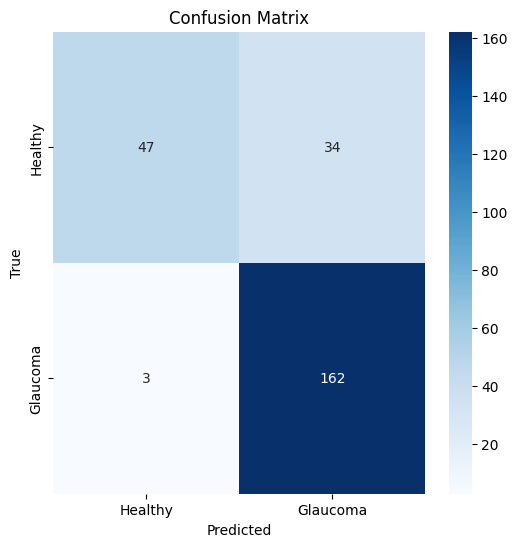

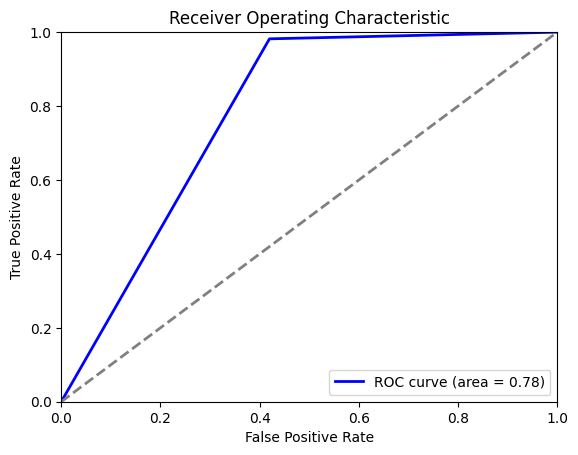

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (precision_score, recall_score, f1_score, fbeta_score, accuracy_score, roc_auc_score, 
                             average_precision_score, cohen_kappa_score, confusion_matrix, classification_report, 
                             roc_curve)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Image Data Generator for loading and augmenting the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Randomly rotate images by 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,         # Randomly shear images by 20%
    zoom_range=0.2,          # Randomly zoom images by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in new pixels with the nearest pixel values
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_generator = train_datagen.flow_from_directory(
    'dataset/70_15_15/train_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/70_15_15/val_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    'dataset/70_15_15/test_70_15_15',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Model Architecture
model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# LSTM layer (if needed, though typically not for image classification)
model.add(Reshape((1, -1)))  # Reshape if using LSTM
model.add(LSTM(64, return_sequences=False))

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Increased Dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Class Weights to handle imbalance
class_weights = {0: 2.04, 1: 1.0}  # Adjust these values based on your class distribution

# Training the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stopping],
    class_weight=class_weights
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Predictions
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int).flatten()
y_true = test_generator.classes

# Metrics Calculation
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
f2 = fbeta_score(y_true, y_pred, beta=2, pos_label=1)
accuracy = accuracy_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred)
ap_score = average_precision_score(y_true, y_pred)
cohen_kappa = cohen_kappa_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
diagnostic_odds_ratio = (conf_matrix[1, 1] * conf_matrix[0, 0]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {recall}')
print(f'F1 Score: {f1}')
print(f'F2 Score: {f2}')
print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc_roc}')
print(f'Average Precision (AP): {ap_score}')
print(f'Cohen\'s Kappa: {cohen_kappa}')
print(f'Diagnostic Odds Ratio: {diagnostic_odds_ratio}')

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Healthy', 'Glaucoma']))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Glaucoma'], yticklabels=['Healthy', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Precision: 0.826530612244898
Recall (Sensitivity): 0.9818181818181818
F1 Score: 0.8975069252077562
F2 Score: 0.9462616822429907
Accuracy: 0.8495934959349594
AUC-ROC: 0.7810325476992144
Average Precision (AP): 0.8236979048825739
Cohen's Kappa: 0.6227306640139268
Diagnostic Odds Ratio: 74.6470588235294
              precision    recall  f1-score   support

     Healthy       0.94      0.58      0.72        81
    Glaucoma       0.83      0.98      0.90       165

    accuracy                           0.85       246
   macro avg       0.88      0.78      0.81       246
weighted avg       0.86      0.85      0.84       246